In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
import itertools
plt.rcParams['font.sans-serif'] = ['SimHei']

### 数据探索

#### 数据获取

In [74]:
df_data = pd.read_csv('./creditcard.csv')

In [75]:
df_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


1. Time时间特征对预测无关，后面可以进行删除。
2. v1-v28为特征数据，需要保留
3. Amount为交易金额，需要保留并做规范化处理。
4. Class为0代表正常，为1代表诈骗，这一列是数据标签。

#### 概览分析

In [76]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

1. 数据完整，没有出现空值

In [77]:
df_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### 可视化探索

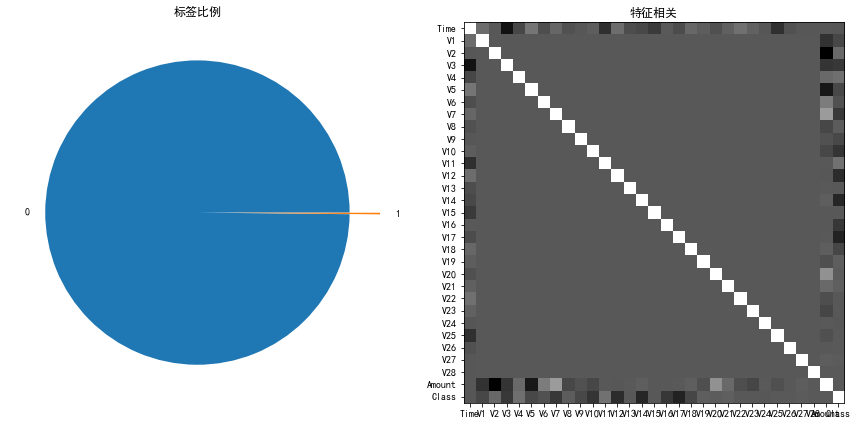

In [94]:
fig, axes = plt.subplots(1,2)    
fig.set_size_inches(15,8)
axes[0].pie(
    x=df_data['Class'].value_counts().tolist(), 
    labels = df_data['Class'].value_counts().index.tolist(),
    explode = np.array([0,0.2])
)           
axes[0].set_title('标签比例')
axes[1].imshow(df_data.corr().values, cmap=plt.cm.gray)
axes[1].set_title('特征相关')
axes[1].set_xticks([x for x in range(len(df_data.columns))])        
axes[1].set_xticklabels([x for x in df_data.columns])   
axes[1].set_yticks([x for x in range(len(df_data.columns))])        
axes[1].set_yticklabels([x for x in df_data.columns])   
plt.show()                      

结论：
* 标签比例极度不平衡，评估指标需要用到精度和召回
* v1-v28特征关系性不大，不降维，都选取为训练的特征

### 数据清理提取

#### 数据清洗

In [98]:
# 复制副本
df_data_features = df_data.copy()
# 删除Time列
df_data_features.pop('Time')
# 规范化Amount列
df_data_features['Amount'] = StandardScaler().fit_transform(df_data_features['Amount'].values.reshape(-1, 1))

#### 数据提取并分离

In [105]:
featrues = df_data_features[[x for x in df_data_features.columns if x != 'Class']]
labels = df_data_features['Class']

In [108]:
train_features, test_features, train_labels, test_labels = train_test_split(featrues, labels, test_size=0.2)

### 模型训练

#### LogisticRegression 算法

In [115]:
lg_clf = LogisticRegression()
lg_clf.fit(train_features, train_labels)
predict_lg = lg_clf.predict(test_features)

#### LinearSVC 算法

In [116]:
svc_clf = LinearSVC()
svc_clf.fit(train_features, train_labels)
predict_svc = svc_clf.predict(test_features)

#### f1 分数对比

In [120]:
print('逻辑回归：', f1_score(test_labels, predict_lg))
print('SVM：', f1_score(test_labels, predict_svc))

逻辑回归： 0.7027027027027026
SVM： 0.7852760736196319


### 模型评估
* 仅选取f1评分高效果最好的

#### 指标数据

In [130]:
print('SVM分类器')
predict = predict_svc
print('准确率：', round(accuracy_score(test_labels, predict), 3))
print('精确度：', round(precision_score(test_labels, predict), 3))
print('召回率：', round(recall_score(test_labels, predict), 3))
print('F1分数：', round(f1_score(test_labels, predict), 3))

SVM分类器
准确率： 0.999
精确度： 0.831
召回率： 0.744
F1分数： 0.785


#### 逻辑回归混淆矩阵

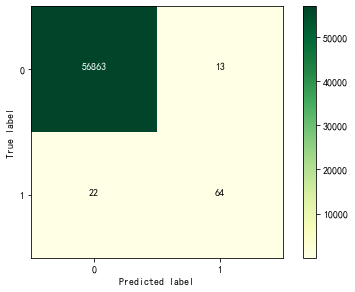

In [144]:
cf_matrix = confusion_matrix(test_labels, predict)
plt.imshow(cf_matrix, cmap=plt.cm.YlGn)
tick_marks = np.arange(2) 
plt.xticks(tick_marks, [0, 1], rotation = 0) 
plt.yticks(tick_marks, [0, 1])
plt.colorbar()
thresh = cf_matrix.max() / 2. 
for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])) : 
    plt.text(j, i, cf_matrix[i, j], 
             horizontalalignment = 'center', 
             color = 'white' if cf_matrix[i, j] > thresh else 'black') 
plt.tight_layout()
plt.ylabel('True label') 
plt.xlabel('Predicted label')
plt.show()

#### 精度-召回曲线

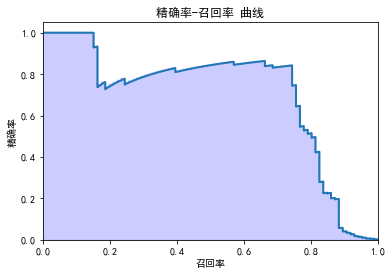

In [150]:
score_labels = svc_clf.decision_function(test_features)
precision, recall, thresholds = precision_recall_curve(test_labels, score_labels)
plt.step(recall, precision, color = 'b', alpha = 0.2, where = 'post') 
plt.fill_between(recall, precision, step ='post', alpha = 0.2, color = 'b') 
plt.plot(recall, precision, linewidth=2) 
plt.xlim([0.0,1]) 
plt.ylim([0.0,1.05]) 
plt.xlabel('召回率') 
plt.ylabel('精确率') 
plt.title('精确率-召回率 曲线') 
plt.show()